In [27]:
#Importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
#Loading .csv file

file_path='NIFTY50_all.csv'
nifty_data=pd.read_csv(file_path)

nifty_data.head(235191)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235186,2021-04-23,ZEEL,EQ,192.30,192.00,193.00,187.0,188.00,188.00,190.04,8529439,1.620902e+14,60790.0,2148300.0,0.2519
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.1,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.8,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.1,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


In [29]:
#Select relevant features where we use OHLV to determine C
features=['Open','High','Low','Volume']
target='Close'

#Drop rows of Null Valueues
nifty_data_cleaned=nifty_data.dropna(subset=features +[target])

#Splitting into test and train 
X=nifty_data_cleaned[features]
y=nifty_data_cleaned[target]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
#Linear Regression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
#Predictions
y_pred=model.predict(X_test)

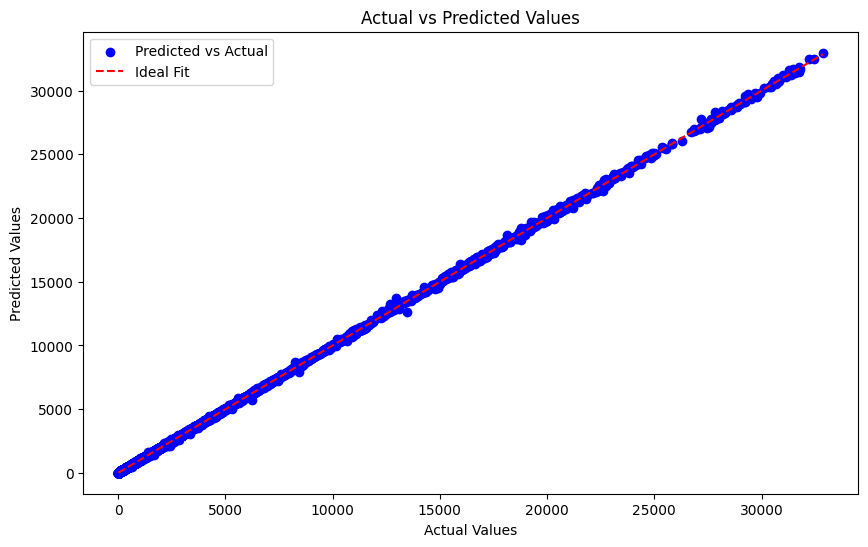

In [32]:
#Plotting the predicted vs actual values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [33]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 22.138964304015662
